In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

## Aniso ORF HL

In [3]:
path_to_orfs = "./aniso_ORF_HL_single_freqs_nside256.npz"

In [4]:
aniso_orf_HL = np.load(path_to_orfs, allow_pickle=True)

In [5]:
list(aniso_orf_HL.keys())

['aniso_ORF_HL_10', 'aniso_ORF_HL_2000', 'nside']

In [6]:
aniso_ORF_HL_10 = aniso_orf_HL["aniso_ORF_HL_10"]
aniso_ORF_HL_2000 = aniso_orf_HL["aniso_ORF_HL_2000"]
aniso_ORF_HL = [aniso_ORF_HL_10, aniso_ORF_HL_2000]
titles = [r"$\gamma_{HL}^{\rm (aniso)}(f=10\, {\rm Hz},\,\hat{\bf n})$", r"$\gamma_{HL}^{\rm (aniso)}(f=2000\, {\rm Hz},\,\hat{\bf n})$"]

/home/delillo/.local/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/delillo/.local/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/delillo/.local/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a reg

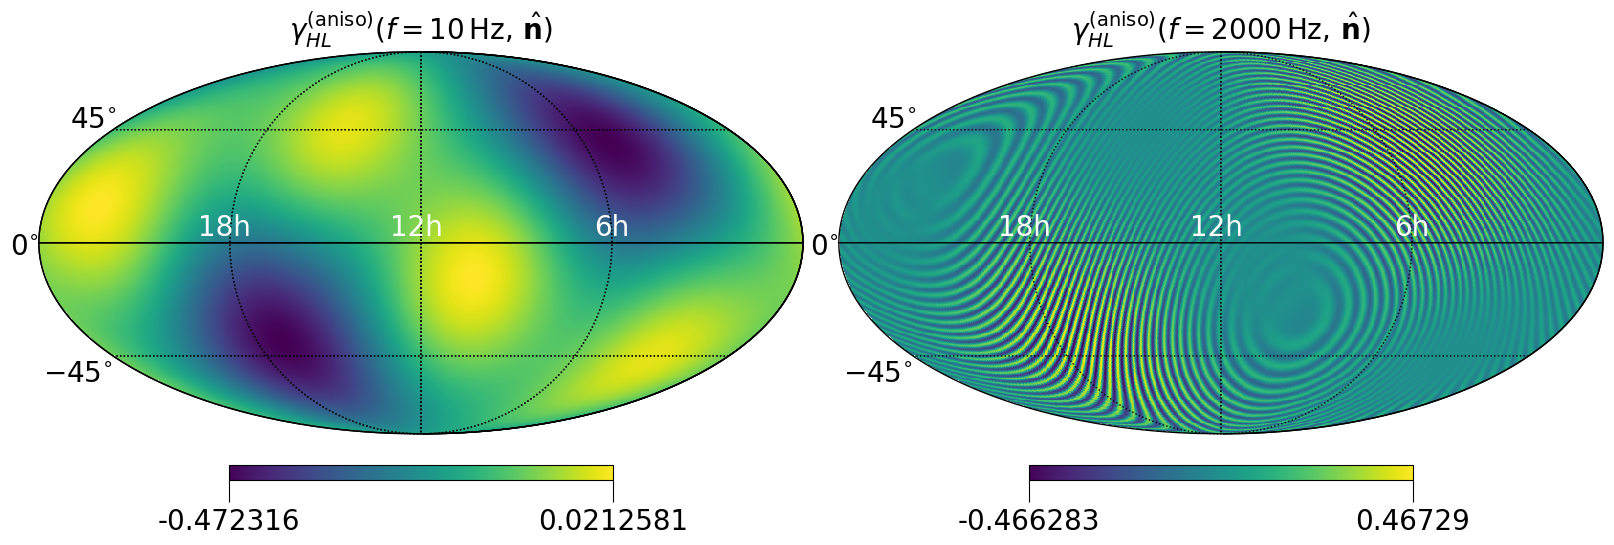

In [7]:
fig = plt.figure(figsize = (16,6))
#Loop over the *combined_maps.hdf5 files for the three spectral indices 0, 2/3 and 3
for orf, title, index in zip (aniso_ORF_HL, titles,range(0,len(aniso_orf_HL))):
    
    #Plot the sky-map for a given alpha as subplot using healpy Mollweide projection
    hp.mollview(np.real(orf),rot=(180,0,0),flip='astro', title=title,nest=False, cbar=True,\
                sub=(1, 2, index+1))#, format = "%.2f")
    
    #Add graticule
    hp.graticule(45,90)
    
    #Add useful annotations on the map for right ascension and declination
    plt.annotate('12h',(0.46,0.52),xycoords='axes fraction', color='w', fontsize=fontsize)
    plt.annotate('6h',(0.725,0.52),xycoords='axes fraction', color='w', fontsize=fontsize)
    plt.annotate('18h',(0.21,0.52),xycoords='axes fraction', color='w', fontsize=fontsize)
    plt.annotate(r'$45^{\circ}$',(0.043,0.8),xycoords='axes fraction', fontsize=fontsize)
    plt.annotate(r'$0^{\circ}$',(-0.035,0.47),xycoords='axes fraction', fontsize=fontsize)
    plt.annotate(r'$-45^{\circ}$',(0.008,0.14),xycoords='axes fraction', fontsize=fontsize) 
    
    #Trick to make colorbars all the same (healpy colorbar does not leave much freedom of customization and it is not used)
    #fig = plt.gcf()
    #ax = plt.gca()  
    #image = ax.get_images()[0]
    #cmap = fig.colorbar(image, ax=ax, shrink=0.7, orientation="horizontal", pad=0.15, aspect = 40, ticks=[np.min(orf), np.max(orf)])
    
#Save the figure    
plt.savefig("./Actual_figures/ORF_HL_aniso_examples.pdf", bbox_inches='tight')

## Point-spread function

In [8]:
HL_ideal_teardrop_nside32_dirty_map_1_1000 = np.load("./HL_ideal_teardrop_nside32_dirty_map_1_1000.npz", allow_pickle=True)["HL_simple_dirty_broad"]
HL_ideal_teardrop_nside32_dirty_map_1_1000_single_time = np.load("./HL_ideal_teardrop_nside32_dirty_map_1_1000_single_time.npz", allow_pickle=True)["HL_ideal_teardrop_nside32_dirty_map"]
HL_ideal_teardrop_nside32_dirty_map_375_single_time = np.load("./HL_ideal_teardrop_nside32_dirty_map_375_single_time.npz", allow_pickle=True)["HL_ideal_teardrop_nside32_dirty_map"]
HL_ideal_teardrop_nside32_dirty_map_375_over_time = np.load("./HL_ideal_teardrop_nside32_dirty_map_375_over_time.npz", allow_pickle=True)["HL_ideal_teardrop_nside32_dirty_map"]

In [9]:
dirty_maps = [[HL_ideal_teardrop_nside32_dirty_map_1_1000, HL_ideal_teardrop_nside32_dirty_map_1_1000_single_time],\
             [HL_ideal_teardrop_nside32_dirty_map_375_over_time, HL_ideal_teardrop_nside32_dirty_map_375_single_time]] 

/home/delillo/.local/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/delillo/.local/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/delillo/.local/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a reg

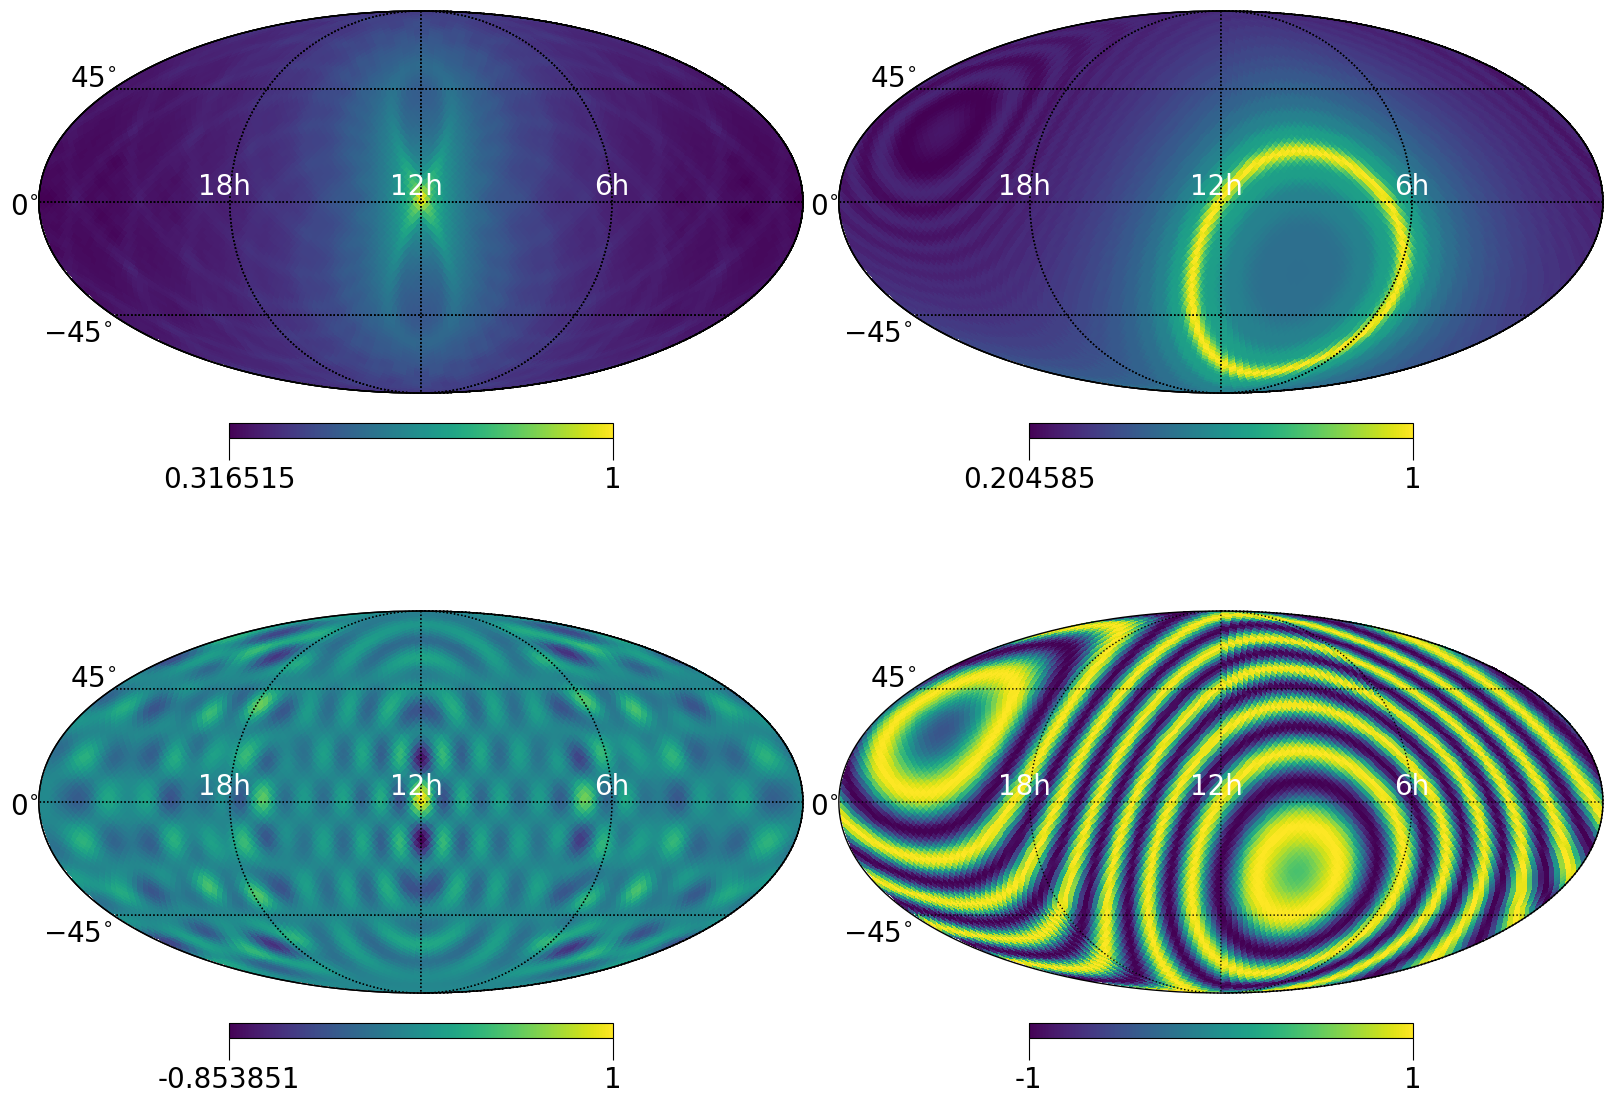

In [10]:
fig = plt.figure(figsize = (16,12))
#Loop over the *combined_maps.hdf5 files for the three spectral indices 0, 2/3 and 3
for orfs, i in zip (dirty_maps,range(0,len(dirty_maps))):
    for orf, j in zip (orfs,range(0,len(orfs))):

        #Plot the sky-map for a given alpha as subplot using healpy Mollweide projection
        hp.mollview(np.real(orf)/np.max(np.abs(orf)),rot=(0,0,0),flip='astro', title="",nest=False, cbar=True,\
                    sub=(2, 2, 2*i+j+1))#, format = "%.2f")

        #Add graticule
        hp.graticule(45,90, linestyle = "dotted")

        #Add useful annotations on the map for right ascension and declination
        plt.annotate('12h',(0.46,0.52),xycoords='axes fraction', color='w', fontsize=fontsize)
        plt.annotate('6h',(0.725,0.52),xycoords='axes fraction', color='w', fontsize=fontsize)
        plt.annotate('18h',(0.21,0.52),xycoords='axes fraction', color='w', fontsize=fontsize)
        plt.annotate(r'$45^{\circ}$',(0.043,0.8),xycoords='axes fraction', fontsize=fontsize)
        plt.annotate(r'$0^{\circ}$',(-0.035,0.47),xycoords='axes fraction', fontsize=fontsize)
        plt.annotate(r'$-45^{\circ}$',(0.008,0.14),xycoords='axes fraction', fontsize=fontsize) 

        #Trick to make colorbars all the same (healpy colorbar does not leave much freedom of customization and it is not used)
        #fig = plt.gcf()
        #ax = plt.gca()  
        #image = ax.get_images()[0]
        #cmap = fig.colorbar(image, ax=ax, shrink=0.7, orientation="horizontal", pad=0.15, aspect = 40, ticks=[np.min(orf), np.max(orf)])
    
#Save the figure    
plt.savefig("./Actual_figures/spread_function_HL_ideal_examples.pdf", bbox_inches='tight')

## SVD regularitation and network effect

In [11]:
baselines = ["HL", "HLV", "HLVK", "HLVKI"]
nside = 4

HL loading data...
SVD...
Done. Now plotting
HLV loading data...
SVD...
Done. Now plotting
HLVK loading data...
SVD...
Done. Now plotting
HLVKI loading data...
SVD...
Done. Now plotting


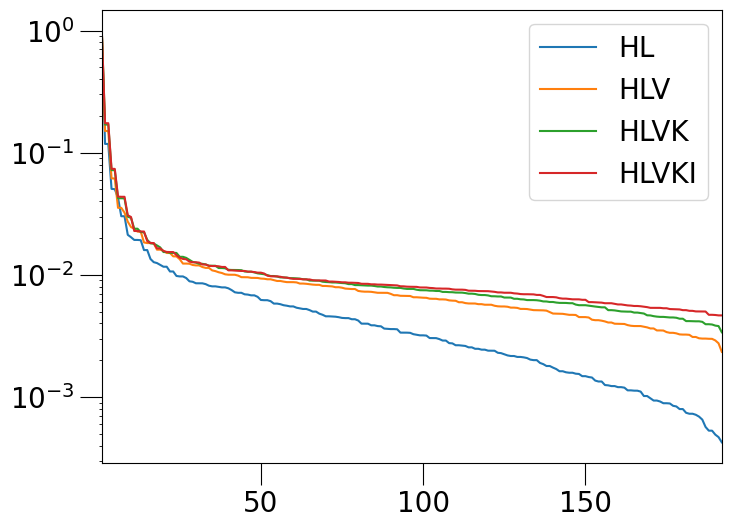

In [12]:
for b in baselines:
    print(b, "loading data...")
    fisher_HL_broad = np.load(f"./{b}_ideal_teardrop_nside{nside}_fisher_full_1_1000.npz", allow_pickle=True)["simple_fisher_broad"]
    print("SVD...")
    _, s, _ = np.linalg.svd(fisher_HL_broad)
    np.savez(f"./{b}_ideal_teardrop_nside{nside}_fisher_full_1_1000_svd.npz", singular_values = s)
    print("Done. Now plotting")
    plt.plot(np.arange(len(s))+1, s/np.max(np.abs(s)), label = f"{b}")
#plt.xscale("log")
plt.yscale("log")
plt.xlim(1, len(s))
plt.legend()
plt.show()

HL loading data...
SVD...
Done. Now plotting
HLV loading data...
SVD...
Done. Now plotting
HLVK loading data...
SVD...
Done. Now plotting
HLVKI loading data...
SVD...
Done. Now plotting


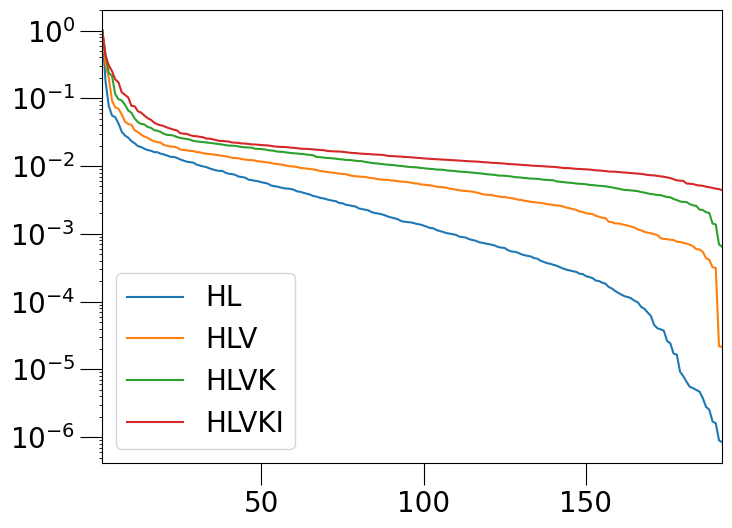

In [13]:
for b in baselines:
    print(b, "loading data...")
    fisher_HL_broad = np.load(f"./{b}_real_ORF_teardrop_nside{nside}_fisher_full_1_1000.npz", allow_pickle=True)["simple_fisher_broad"]
    print("SVD...")
    _, s, _ = np.linalg.svd(fisher_HL_broad)
    np.savez(f"./{b}_real_ORF_teardrop_nside{nside}_fisher_full_1_1000_svd.npz", singular_values = s)
    print("Done. Now plotting")
    plt.plot(np.arange(len(s))+1, s/np.max(np.abs(s)), label = f"{b}")
#plt.xscale("log")
plt.yscale("log")
plt.xlim(1, len(s))
plt.legend()
plt.show()

In [14]:
b_IJ = ["HL", "HV", "LV", "HK", "LK", "VK", "HI", "LI", "VI","KI"]
for nside in [4, 8, 16]:
    print(nside)
    for b in b_IJ:
        print(b, "loading data...")
        fisher_HL_broad = np.load(f"./{b}_ideal_teardrop_nside{nside}_fisher_full_1_1000.npz", allow_pickle=True)["simple_fisher_broad"]
        print("SVD for ideal ORF...")
        _, s, _ = np.linalg.svd(fisher_HL_broad)
        np.savez(f"./{b}_ideal_teardrop_nside{nside}_fisher_full_1_1000_svd.npz", singular_values = s)
        print("Done.\n ")
        fisher_HL_broad = np.load(f"./{b}_real_ORF_teardrop_nside{nside}_fisher_full_1_1000.npz", allow_pickle=True)["simple_fisher_broad"]
        print("SVD for real ORF...")
        _, s, _ = np.linalg.svd(fisher_HL_broad)
        np.savez(f"./{b}_real_ORF_teardrop_nside{nside}_fisher_full_1_1000_svd.npz", singular_values = s)
        print("Done. Now plotting")

4
HL loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
HV loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
LV loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
HK loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
LK loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
VK loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
HI loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
LI loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
VI loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
KI loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
8
HL loading data...
SVD for ideal ORF...
Done.
 
SVD for real ORF...
Done. Now plotting
HV loading data...
SVD for ideal ORF...

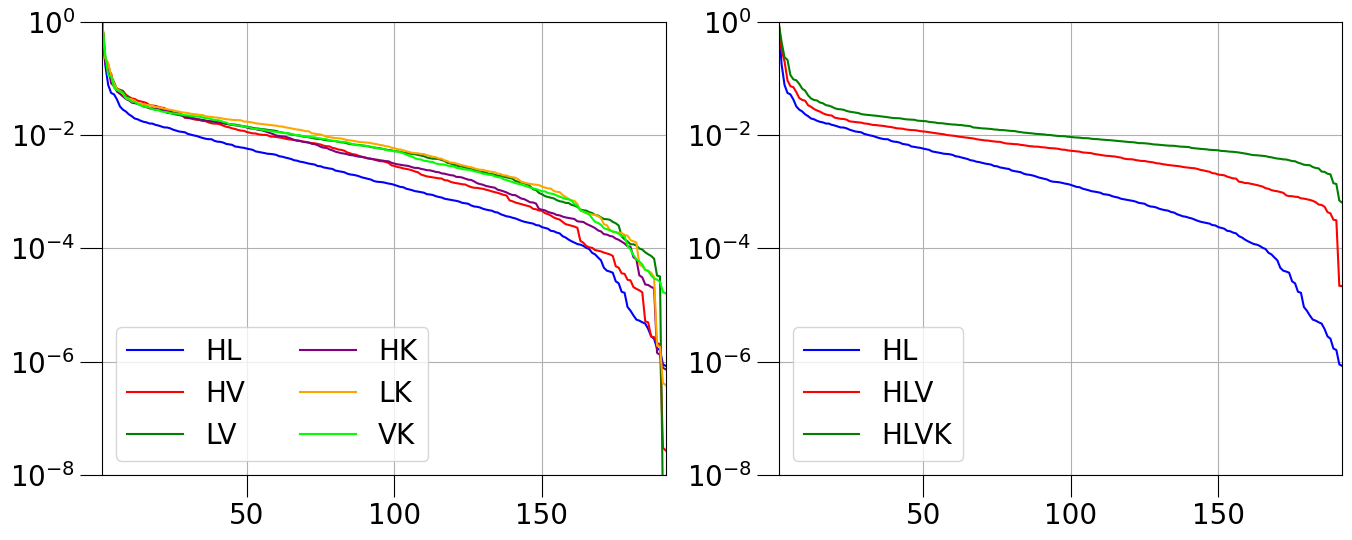

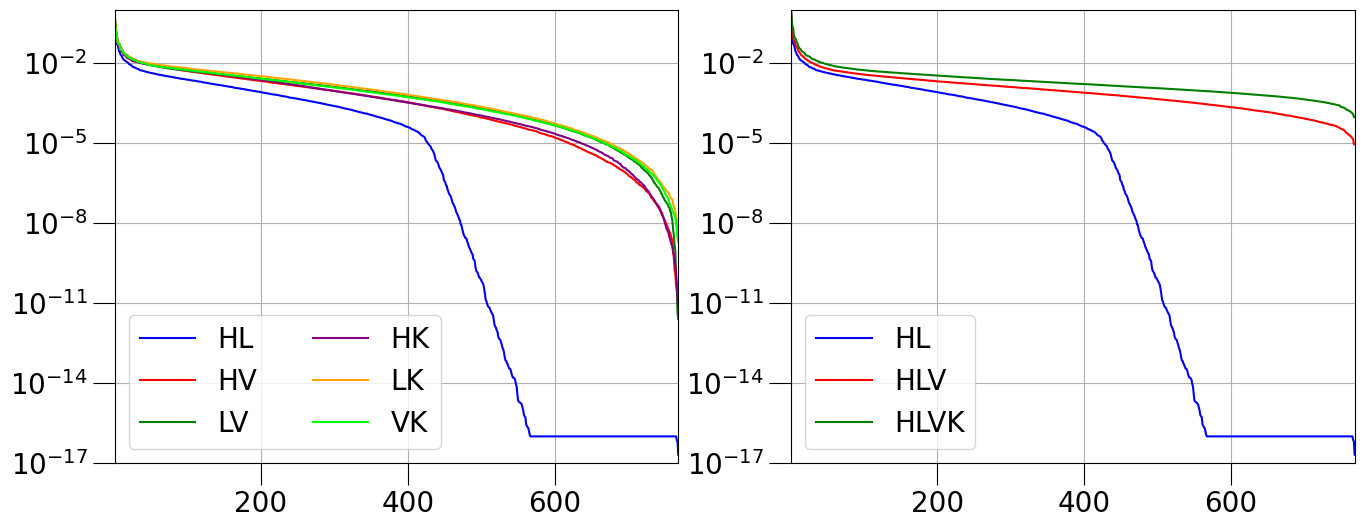

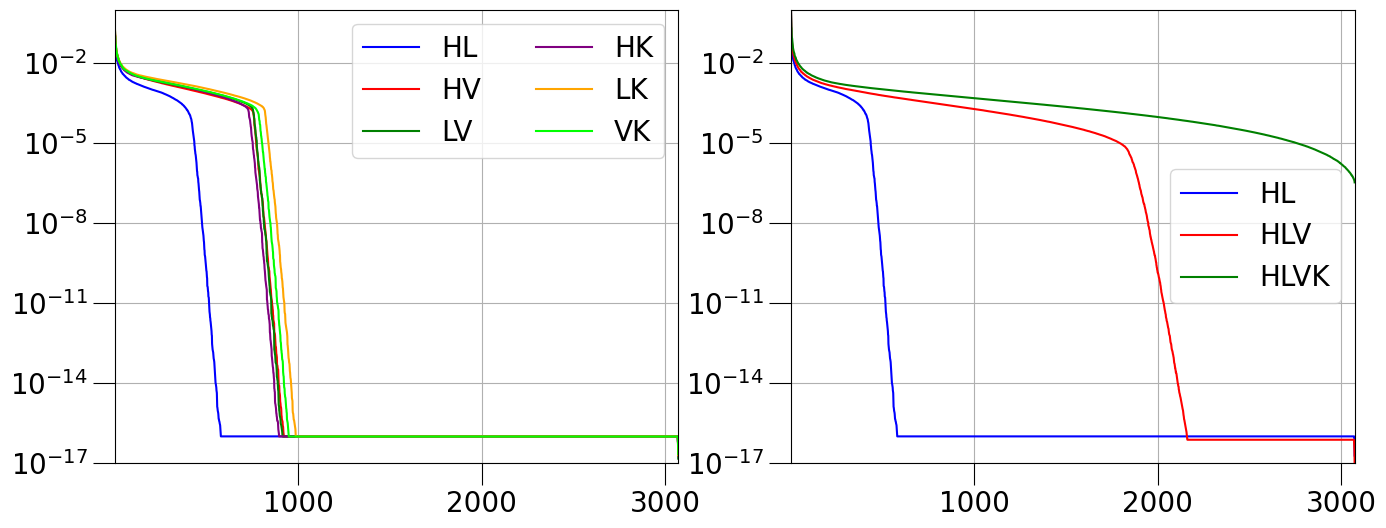

In [40]:
for nside, ymin in zip([4, 8, 16], [1e-8, 1e-17, 1e-17]):
    fig, (ax_IJ, ax_network) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    b_IJ = ["HL", "HV", "LV", "HK", "LK", "VK"]
    colors_IJ = {"HL":"blue", "HV":"red", "LV":"green", "HK":"purple", "LK":"orange", "VK":"lime"}
    b_network = ["HL", "HLV", "HLVK"]
    colors_network = {"HL":"blue", "HLV":"red", "HLVK":"green"}
    
    for b in b_IJ:
        s = np.load(f"./{b}_real_ORF_teardrop_nside{nside}_fisher_full_1_1000_svd.npz")["singular_values"]
        ax_IJ.plot(np.arange(len(s))+1, s/np.max(np.abs(s)), label = f"{b}", color = colors_IJ[b])
    ax_IJ.set_yscale("log")
    ax_IJ.set_xlim(1, len(s))
    ax_IJ.set_ylim(ymin, 1)
    ax_IJ.grid()
    ax_IJ.legend(ncol = 2)
    
    for b in b_network:
        s = np.load(f"./{b}_real_ORF_teardrop_nside{nside}_fisher_full_1_1000_svd.npz")["singular_values"]
        ax_network.plot(np.arange(len(s))+1, s/np.max(np.abs(s)), label = f"{b}", color = colors_network[b])
    ax_network.set_yscale("log")
    ax_network.set_xlim(1, len(s))
    ax_network.set_ylim(ymin, 1)
    ax_network.legend()
    ax_network.grid()
    
    plt.savefig(f"./Actual_figures/SVD_decomposition_network_regularisation_nside{nside}.pdf", bbox_inches = "tight")
    plt.show()
    plt.close()

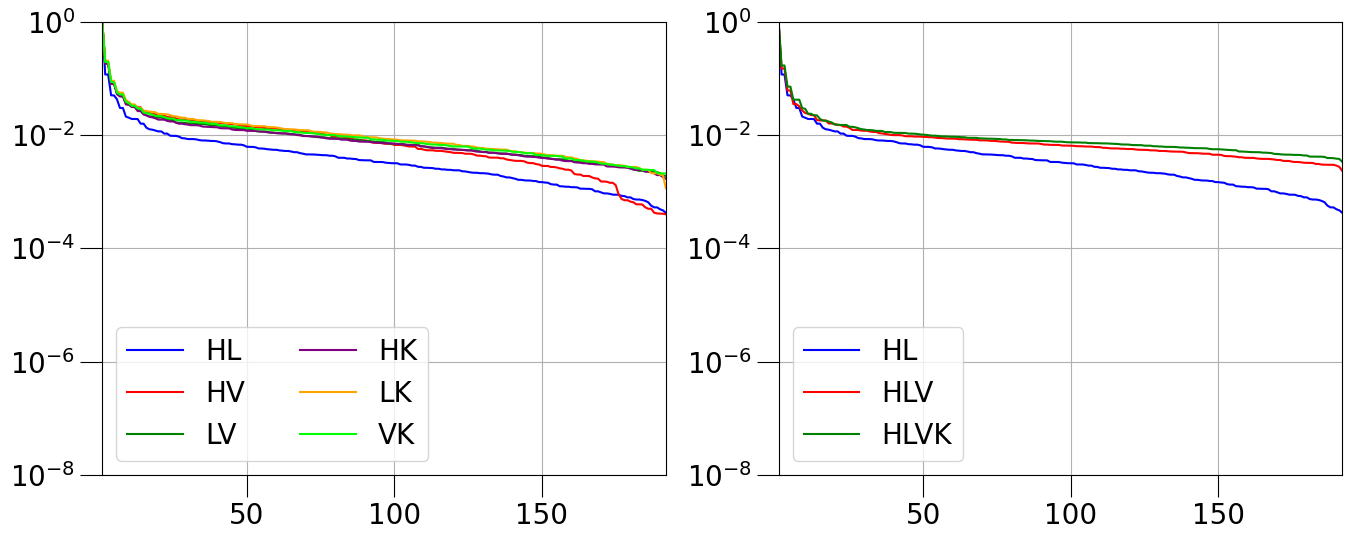

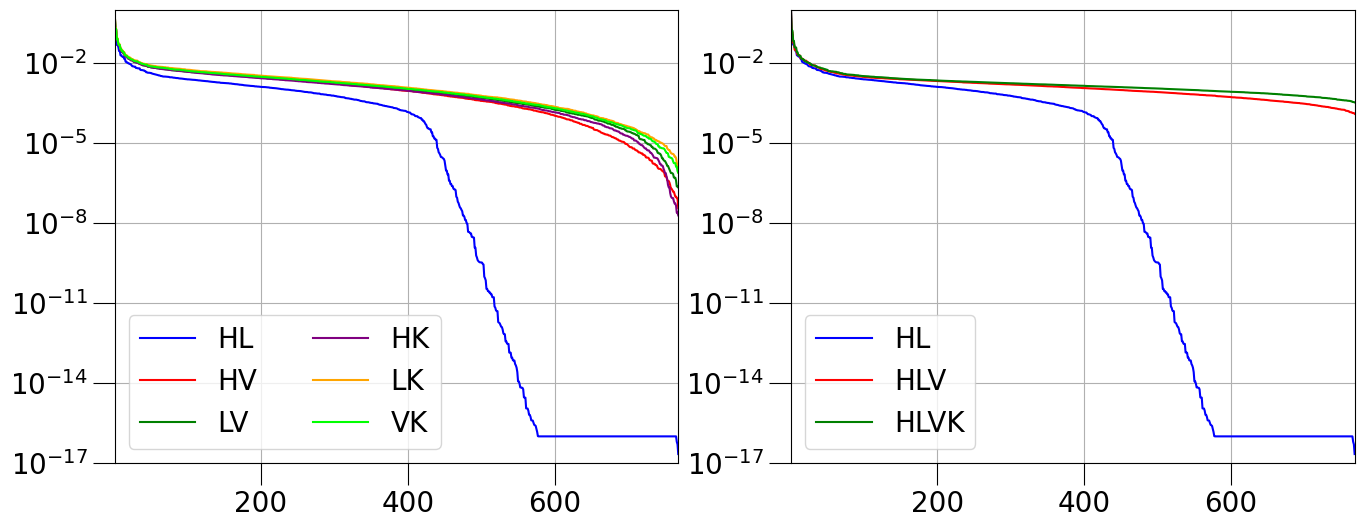

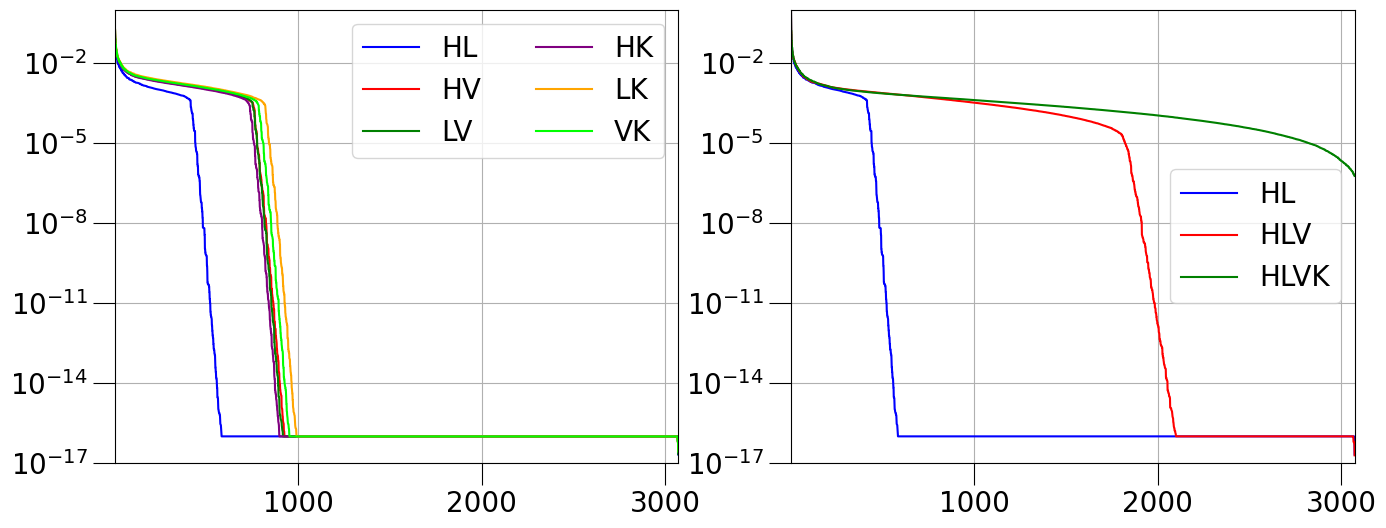

In [41]:
for nside, ymin in zip([4, 8, 16], [1e-8, 1e-17, 1e-17]):
    fig, (ax_IJ, ax_network) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    b_IJ = ["HL", "HV", "LV", "HK", "LK", "VK"]
    colors_IJ = {"HL":"blue", "HV":"red", "LV":"green", "HK":"purple", "LK":"orange", "VK":"lime"}
    b_network = ["HL", "HLV", "HLVK"]
    colors_network = {"HL":"blue", "HLV":"red", "HLVK":"green"}
    
    for b in b_IJ:
        s = np.load(f"./{b}_ideal_teardrop_nside{nside}_fisher_full_1_1000_svd.npz")["singular_values"]
        ax_IJ.plot(np.arange(len(s))+1, s/np.max(np.abs(s)), label = f"{b}", color = colors_IJ[b])
    ax_IJ.set_yscale("log")
    ax_IJ.set_xlim(1, len(s))
    ax_IJ.set_ylim(ymin, 1)
    ax_IJ.grid()
    ax_IJ.legend(ncol = 2)
    
    for b in b_network:
        s = np.load(f"./{b}_ideal_teardrop_nside{nside}_fisher_full_1_1000_svd.npz")["singular_values"]
        ax_network.plot(np.arange(len(s))+1, s/np.max(np.abs(s)), label = f"{b}", color = colors_network[b])
    ax_network.set_yscale("log")
    ax_network.set_xlim(1, len(s))
    ax_network.set_ylim(ymin, 1)
    ax_network.legend()
    ax_network.grid()
    
    #plt.savefig("./Actual_figures/SVD_decomposition_network_regularisation.pdf", bbox_inches = "tight")
    plt.show()
    plt.close()